In [ ]:
import matplotlib.pyplot as plt
import scipy.optimize as fit
import scipy.stats as stats
import numpy as np

simulate Hubble dataset of galaxy distance versus fractional redshift

Text(0, 0.5, 'y_i')

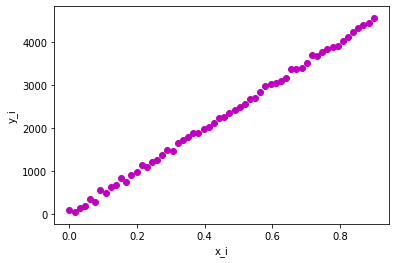

In [ ]:
N = 60   # number of data points
m = 5000 # slope
c = 0.0  # offset
s = 50   # std. dev.
np.random.seed(1)

xi = np.linspace( 0.0, 0.9, num=N)                  # indep. variable
yi = m*xi + c                                     # dep. variable
yi += np.random.normal( loc=0.0, scale=s, size=N) # noise (center, width, size)
si = s*np.ones(N)                                 # variable uncertainties

plt.errorbar(xi, yi, yerr=si,fmt='mo')
plt.xlabel("x_i")
plt.ylabel("y_i")

fit, plot simulated Hubble dataset

slope =  5027.213551557672  +/-  24.43451042099325
offset =  -11.830381218081016  +/-  12.750228706463595
covariance coeff =  -268.67038188602834 correlation coeff =  -0.8623790070046873
chisq =  50.258379381571075 chisqpdf =  0.8665237824408806


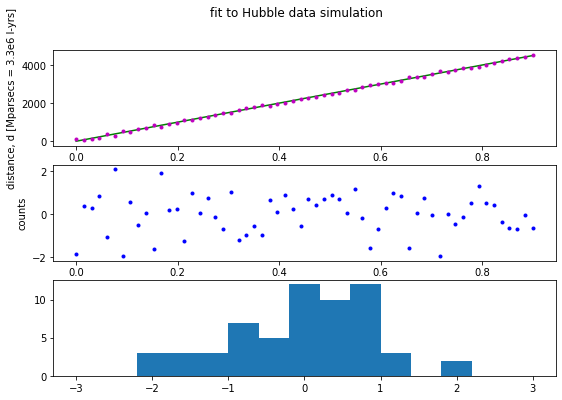

In [ ]:
p1array = [] # gradient descent diagnostics
p2array = []
(N-2)
def func(x, p1, p2):
    p1array.append(p1)
    p2array.append(p2)
    return p1*x+p2

pars, covs = fit.curve_fit(func, xi, yi, sigma=si, absolute_sigma=True)

yf =  pars[0]*xi + pars[1]
residuals = (yf-yi)/si
chisq = np.sum(residuals**2)
chisqpdf = chisq / (N-2)

print("slope = ",pars[0]," +/- ",np.sqrt(covs[0,0]))
print("offset = ",pars[1]," +/- ",np.sqrt(covs[1,1]))
print("covariance coeff = ",covs[0,1],"correlation coeff = ",covs[0,1]/np.sqrt(covs[0,0]*covs[1,1]) )

print("chisq = ", chisq, "chisqpdf = ", chisqpdf)

fig, axes = plt.subplots(3,figsize=(9, 6))
fig.suptitle('fit to Hubble data simulation')

axes[0].errorbar(xi, yi, yerr=si, fmt='m.')
axes[0].plot(xi, yf, 'g-')
axes[0].set_xlabel("fractional red shift, z (equals v/c for v<<c)" )
axes[0].set_ylabel("distance, d [Mparsecs = 3.3e6 l-yrs]")

axes[1].plot(xi,residuals, "b.")
axes[1].set_xlabel("xi")
axes[1].set_ylabel("residuals (yf-yi)/si")

counts, binedges, bars = plt.hist(residuals, bins=15, range=(-3.0,3.0))   # build histogram
axes[1].set_xlabel("(yf-yi)/si")
axes[1].set_ylabel("counts")

plt.savefig('fit-results.png')

chi-squared versus slope, m, and offset, c, and gradient descent

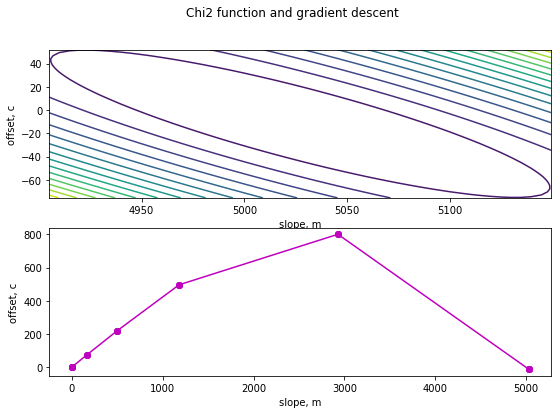

In [ ]:
def chisq(p0, p1, x, y, s):
    return np.sum(( (y - p0*x - p1 ) / s )**2 )
(N-2)
Np = 50
chi2 = np.zeros((Np, Np))
mf = np.linspace( pars[0]-5.*np.sqrt(covs[0][0]), pars[0]+5.*np.sqrt(covs[0][0]),Np)
cf = np.linspace( pars[1]-5.*np.sqrt(covs[1][1]), pars[1]+5.*np.sqrt(covs[1][1]),Np)

im = 0
for xm in mf:
    ic = 0
    for yc in cf:
        chi2[im][ic] = chisq(xm,yc,xi,yi,si)
        ic += 1
    im += 1

fig, axes = plt.subplots(2,figsize=(9, 6))
fig.suptitle('Chi2 function and gradient descent')

axes[0].contour(mf,cf,chi2,15)
axes[0].set_xlabel("slope, m")
axes[0].set_ylabel("offset, c")

axes[1].plot(p1array,p2array,"mo-")
axes[1].set_xlabel("slope, m")
axes[1].set_ylabel("offset, c")

plt.savefig('chi squared contours.png')


fit, plot many simulated Hubble datasets

In [ ]:
mpar = []
cpar = []
chisq = []

Nfit = 1000
for Ifit in range(Nfit):
    yi = m*xi + c                                     # dep. variable
    yi += np.random.normal( loc=0.0, scale=s, size=N) # noise (center, width, size)
    si = s*np.ones(N)                                 # variable uncertainties

    pars, covs = fit.curve_fit(func, xi, yi, sigma=si, absolute_sigma=True)
    yf =  pars[0]*xi + pars[1]
    residuals = (yf-yi)/si
    chisquare= np.sum(residuals**2)

    mpar.append(pars[0]-m) # slope m, fit less truth
    cpar.append(pars[1]-c) # offset c, fit less truth
    chisq.append(chisquare)     # fit chi^2


Chi-squared distribution for simulated Hubble datasets

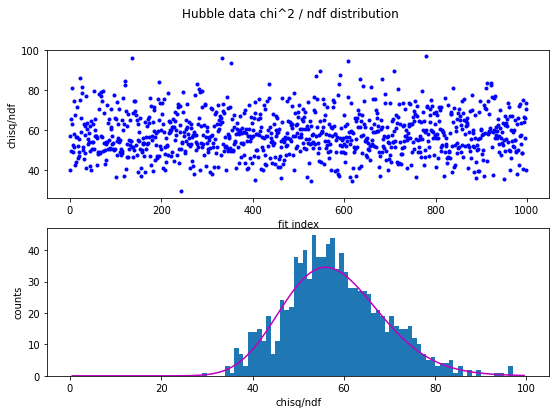

In [ ]:
fig, axes = plt.subplots(2,figsize=(9, 6))
fig.suptitle('Hubble data chi^2 / ndf distribution')

axes[0].plot(chisq, "b.")
axes[0].set_xlabel("fit index")
axes[0].set_ylabel("chisq/ndf")

counts, binedges, bars = axes[1].hist(chisq, bins=100, range=(0.0,100.0))   # build histogram
bincenters = np.mean(np.vstack([binedges[0:-1],binedges[1:]]), axis=0)
norm = counts[N-2]/stats.chi2.pdf( N-2, N-2)
axes[1].plot( bincenters, norm*stats.chi2.pdf( bincenters, N-2), "m-", label="fit")
axes[1].set_xlabel("chisq/ndf")
axes[1].set_ylabel("counts")

plt.savefig('chi2-distibution.png')

slope parameter, m, for simulated Hubble datasets

In [ ]:
def gauss( xval, ampl, cent, sgma):
    return ampl*np.exp( -(xval - cent)**2 / (2.*sgma**2) )

fig, axes = plt.subplots(2,figsize=(9, 6))
fig.suptitle('Hubble data slope parameter distribution')

axes[0].plot(mpar, "b.")
axes[0].set_xlabel("fit index")
axes[0].set_ylabel("slope fit-truth, m")

counts, binedges, bars = plt.hist(mpar, bins=25, range=(-100,100), label="data")
axes[1].set_xlabel("slope fit-truth, m")
axes[1].set_ylabel("counts")

bincenters = np.mean(np.vstack([binedges[0:-1],binedges[1:]]), axis=0)
mpars, mcovs = fit.curve_fit(gauss, bincenters, counts)
gf = gauss( bincenters, mpars[0], mpars[1], mpars[2] )
plt.plot(bincenters,gf, "m-", label="fit")

print("centriod = ",mpars[1]," +/- ",np.sqrt(mcovs[1,1]))
print("width = ",mpars[2]," +/- ",np.sqrt(mcovs[2,2]))

plt.savefig('slope-distibution.png')

offset parameter, c, for simulated Hubble datasets

In [ ]:
def gauss( xval, ampl, cent, sgma):
    return ampl*np.exp( -(xval - cent)**2 / (2.*sgma**2) )

fig, axes = plt.subplots(2,figsize=(9, 6))
fig.suptitle('Hubble data offset parameter distribution')

axes[0].plot(cpar, "b.")
axes[0].set_xlabel("fit index")
axes[0].set_ylabel("offset fit-truth, c")

counts, binedges, bars = plt.hist(cpar, bins=25, range=(-100,100), label="data")
axes[1].set_xlabel("offset fit-truth, c")
axes[1].set_ylabel("counts")

bincenters = np.mean(np.vstack([binedges[0:-1],binedges[1:]]), axis=0)
cpars, ccovs = fit.curve_fit(gauss, bincenters, counts)
gf = gauss( bincenters, cpars[0], cpars[1], cpars[2] )
plt.plot(bincenters,gf, "m-", label="fit")

print("centriod = ",mpars[1]," +/- ",np.sqrt(mcovs[1,1]))
print("width = ",mpars[2]," +/- ",np.sqrt(mcovs[2,2]))

plt.savefig('slope-distibution.png')


slope, offset correlation


In [ ]:

plt.scatter(mpar,cpar)
plt.title('slope, offset correlation')
plt.xlabel("slope, fit - truth")
plt.ylabel("offset, fit - truth")

plt.savefig('slope offset correlation.png')